In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
from math import radians, cos, sin

## COORDENADAS DE TALUD

   X  Y
0  1  2
1  3  4
2  5  6
3  7  8


Text(0.5, 1.0, 'Talud')

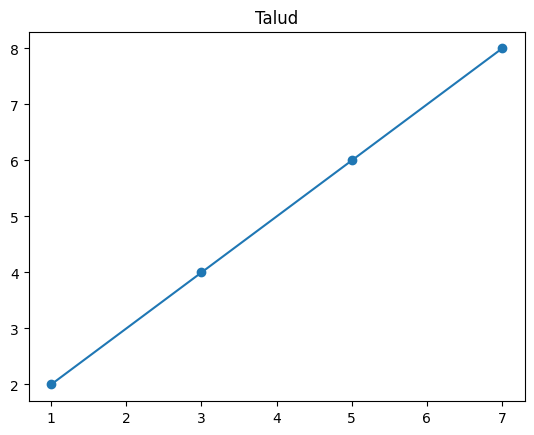

In [61]:
x = []
y = []

n_coor = int(input("Ingrese la cantidad de coordenadas que desea que debe de tener su talud"))

for i in range(n_coor):
    x_ = int(input('ingrese un x'))
    y_ = int(input('ingrese un y'))
    x.append(x_)
    y.append(y_)
    
talud = {
    'X' : x,
    'Y' : y
}

talud_xy = pd.DataFrame(talud)
print(talud_xy)
plt.scatter(talud_xy['X'], talud_xy['Y'])
plt.plot(talud_xy['X'], talud_xy['Y'])
plt.title("Talud")
#plt.show()

## ELIPSE

In [65]:
def draw_ellipse(a,b,salto_fi):

    angulos = list(range(0,360+salto_fi,salto_fi))

    contorno_x = []
    contorno_y = []
    for i in angulos:
        new_x = a * cos(radians(i))
        new_y = b * sin(radians(i))
        contorno_x.append(new_x)
        contorno_y.append(new_y)

    elipse = {
        'X' : contorno_x,
        'Y' : contorno_y
    }

    d_elipse = pd.DataFrame(elipse)
    plt.scatter(d_elipse['X'], d_elipse['Y'])
    plt.plot(d_elipse['X'], d_elipse['Y'])
    plt.title("Connected Scatterplot points with line")
    #plt.show()

    return d_elipse

a = int(input('Ingrese el radio mayor'))
b = int(input('Ingrese el radio menos'))
salto_fi = int(input('Ingrese el angulo inicial'))


In [66]:
def k1234_notime(fuerza, masa): #no depende del tiempo
    k = fuerza/masa
    return k

## delta del tiempo real = 10^-9
def velocidad_x(vo, fuerza, masa, delta_time=1):

    time = list(range(0,20, delta_time)) #where: time[0] = condiciones iniciales 
    
    #t=1
    veloc_x = [vo]
    for i in range(1,len(time),1):
        k1 = k1234_notime(fuerza, masa)
        k2 = k1234_notime(fuerza, masa)
        k3 = k1234_notime(fuerza, masa)
        k4 = k1234_notime(fuerza, masa)

        velocidad = veloc_x[i-1] + (1/6)*(k1 + (2*k2) + (2*k3) + k4)*(delta_time)
        veloc_x.append(velocidad)
    
    return veloc_x

print(velocidad_x(155.9 , 0 , 120))

[155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9, 155.9]


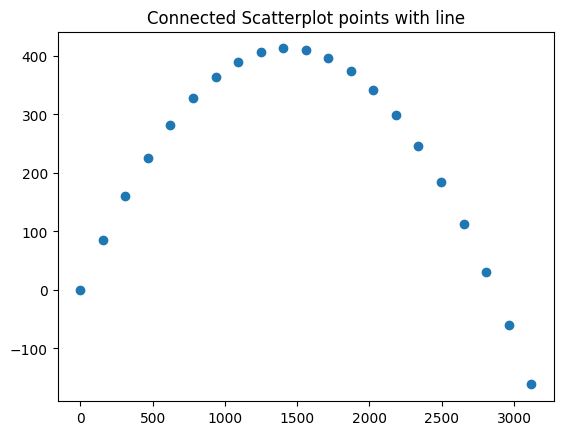

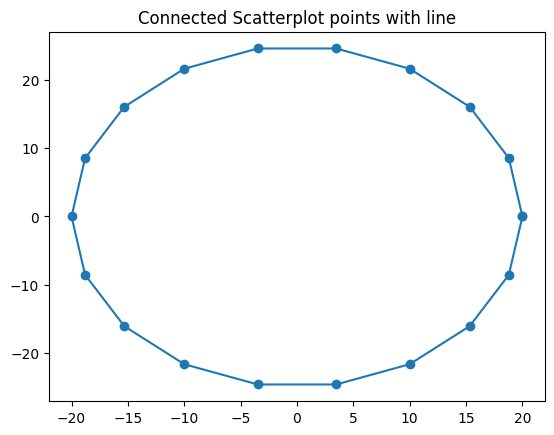

In [68]:
def k1(vo , fuerza , masa, time_back):
    fxm = fuerza/masa
    k1_ = vo + (fxm * time_back)
    return k1_

def k2(vo , fuerza , masa, time_back, delta_time):
    fxm = fuerza/masa
    k2_ = vo + (fxm * (time_back + (0.5*delta_time)))
    return k2_

def k3(vo , fuerza , masa, time_back, delta_time):
    fxm = fuerza/masa
    k3_ = vo + (fxm * (time_back + (0.5*delta_time)))
    return k3_

def k4(vo , fuerza , masa, time_back, delta_time):
    fxm = fuerza/masa
    k4_ = vo + (fxm * (time_back + delta_time))
    return k4_

def posiciones_x(vo, pos_o, fuerza, masa, delta_time=1):

    time = list(range(0,20, delta_time)) #where: time[0] = condiciones iniciales 
    velocidades = velocidad_x(vo, fuerza, masa)

    #t=1
    pos_x = [pos_o]
    for i in range(1, len(time)+1, 1):
        k1_ = k1(vo, fuerza, masa, time[i-1])
        k2_ = k2(vo, fuerza, masa, time[i-1], delta_time)
        k3_ = k3(vo, fuerza, masa, time[i-1], delta_time)
        k4_ = k4(vo, fuerza, masa, time[i-1], delta_time)

        posicion = pos_x[i-1] + (1/6)*(k1_ + (2*k2_) + (2*k3_) + k4_)*(delta_time)
        pos_x.append(posicion)

    return pos_x

##faltaria agregar la mg en el eje Y
def posiciones_y(vo, pos_o, fuerza, masa, delta_time=1):

    time = list(range(0,20, delta_time)) #where: time[0] = condiciones iniciales 
    velocidades = velocidad_x(vo, fuerza, masa)

    #t=1
    pos_y = [pos_o]
    for i in range(1, len(time)+1, 1):
        k1_ = k1(vo, fuerza, masa, time[i-1])
        k2_ = k2(vo, fuerza, masa, time[i-1], delta_time)
        k3_ = k3(vo, fuerza, masa, time[i-1], delta_time)
        k4_ = k4(vo, fuerza, masa, time[i-1], delta_time)

        posicion = pos_y[i-1] + (1/6)*(k1_ + (2*k2_) + (2*k3_) + k4_)*(delta_time)
        pos_y.append(posicion)

    return pos_y


x = posiciones_x(155.9 , 0 , 0 , 120)
y = posiciones_y(90, 0 , -1177 , 120)

moves = {
    'X' : x, 
    'Y' : y
}

dinamic = pd.DataFrame(moves)
plt.scatter(dinamic['X'], dinamic['Y'])
plt.title("Connected Scatterplot points with line")
plt.show()

draw_ellipse(a,b,salto_fi)

def move_ellipse():
    return 